In [3]:
import osmnx as ox
import pandas as pd
import numpy as np
import networkx as nx
import os
import sys
import pickle
import seaborn as sns

from matplotlib import ticker
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [4]:
ROOT_DIR = "/home/charles/Projects/QcMtlStreets"
#ROOT_DIR = "/home/dhw3172/projects/qcMtlStreets"
#ROOT_DIR = "/home/charles.gauvin/projects/qcMtlStreets"
sys.path.append(os.path.join(ROOT_DIR, "Python"))   
os.chdir(ROOT_DIR)

In [5]:
filePathPickle=os.path.join(ROOT_DIR,"Data","Pickle", "graphElevationQc.pickle")
if os.path.isfile(filePathPickle):
    print("File exists => reading graph")
    pickle_inQc = open(filePathPickle,"rb")
    graphQcWithElevation = pickle.load(pickle_inQc)
else:
    print("File does not exists => calling google api")

File exists => reading graph


In [6]:
graphQcWithElevationBearings=ox.add_edge_bearings(graphQcWithElevation)

In [15]:
bear=pd.Series([data["bearing"] for u,v,k,data in graphQcWithElevationBearings.edges(data=True,keys=True)])

In [16]:
bear.head()

0    320.299
1    229.920
2     45.075
3    222.038
4    136.502
dtype: float64

In [21]:
numBins=30

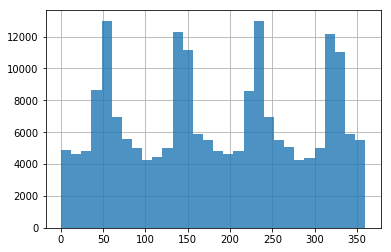

In [22]:
ax=bear.hist(bins=numBins,zorder=2,alpha=0.8)

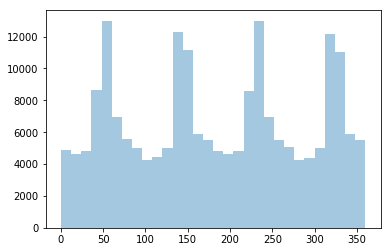

In [23]:
sns.distplot(bear,bins=numBins,kde=False)

In [48]:
count, division = np.histogram(bear,
                               bins=[ang*360/numBins for ang in range(0,numBins+1)])

In [49]:
division

array([  0.,  12.,  24.,  36.,  48.,  60.,  72.,  84.,  96., 108., 120.,
       132., 144., 156., 168., 180., 192., 204., 216., 228., 240., 252.,
       264., 276., 288., 300., 312., 324., 336., 348., 360.])

In [50]:
division[0:-1]

array([  0.,  12.,  24.,  36.,  48.,  60.,  72.,  84.,  96., 108., 120.,
       132., 144., 156., 168., 180., 192., 204., 216., 228., 240., 252.,
       264., 276., 288., 300., 312., 324., 336., 348.])

In [51]:
width=2*np.pi/numBins

In [52]:
division = division[0:-1]

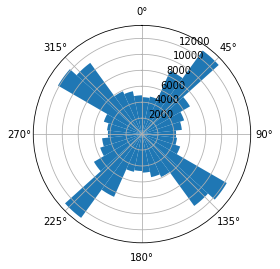

In [53]:
ax = plt.subplot(111,projection="polar")
ax.set_theta_zero_location("N")
ax.set_theta_direction("clockwise")

bars=ax.bar(division*np.pi/180-width*0.5,count,width)

In [43]:
print(len(count), len(division))

30 30


In [44]:
plt.show()